In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 10
N = L*L

In [3]:
@nb.njit
def calcula_media(vetor):
    media = sum(vetor)/len(vetor)
    return media

In [4]:
@nb.njit
def calcula_media_quadrado(vetor):
    media = 0
    for item in vetor:
        media += item*item
    media = media/len(vetor)
    return media

In [5]:
@nb.njit
def cria_inicial(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            a = np.random.randint(2)
            if a:
                spins[count] = 1
            else:
                spins[count] = -1
            count += 1
            
    return x, y, spins

In [6]:
@nb.njit
def cria_inicial_1(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            spins[count] = 1
            count += 1
            
    return x, y, spins

In [7]:
@nb.njit
def cria_inicial_xadrez(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            if (i+j)%2:
                spins[count] = 1
            else:
                spins[count] = -1
            count += 1
            
    return x, y, spins

In [8]:
@nb.njit
def vizinhos(N):
    L = int(np.sqrt(N))
    viz = np.zeros((N,4), dtype=np.int32)
    
    for i in range(N):
        if (i+1)%L == 0:
            viz[i][0] = i+1-L
        else:
            viz[i][0] = i+1
            
        viz[i][1] = (i+L)%N
        
        if i%L == 0:
            viz[i][2] = i-1+L
        else:
            viz[i][2] = i-1
        
        viz[i][3] = (i-L)%N
    
    return viz

In [9]:
@nb.njit
def energia(spins, viz):
    N = len(spins)
    E = 0
    
    for i in range(N):
        h = spins[int(viz[i,0])] + spins[int(viz[i,1])]
        E -= spins[i] * h
    
    mag = np.sum(spins)
    return E, mag

In [10]:
@nb.njit
def expos(beta):
    ex = np.zeros(5,dtype=np.float32)
    ex[0]=np.exp(8.0*beta)
    ex[1]=np.exp(4.0*beta)
    ex[2]=1.0
    ex[3]=np.exp(-4.0*beta)
    ex[4]=np.exp(-8.0*beta)
    return ex

In [11]:
@nb.njit
def monte_carlo_passo(spins, viz, exp, ener, mag):
    N = len(spins)
    
    for i in range(N):
        h = spins[viz[i,0]]+spins[viz[i,1]]+spins[viz[i,2]]+spins[viz[i,3]] # soma dos vizinhos
        dif = int(spins[i]*h*0.5+2)
        
        if np.random.random() < exp[dif]:
            spins[i] = -spins[i]
            ener += dif*4 - 8
            mag += 2*spins[i]
            
    return spins, ener, mag

-8 4


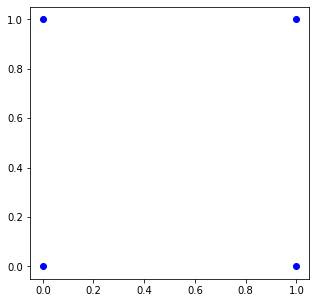

In [12]:
L = 2
N = L*L
temperatura = 1
beta = 1/temperatura

x, y, spins = cria_inicial_1(L)
viz = vizinhos(N)
ener, mag = energia(spins,viz)
print(ener, mag)
exp = expos(beta)
plt.figure(figsize=(5,5))
for i in range(N):
    if spins[i] == 1:
        plt.scatter(x[i],y[i],color='b')
    else: 
        plt.scatter(x[i],y[i],color='r')
plt.show()

-8 4


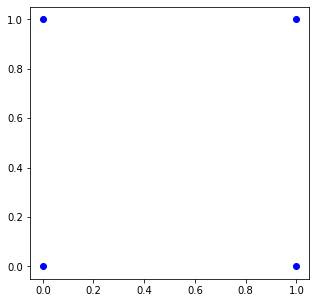

In [13]:
spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
print(ener, mag)
plt.figure(figsize=(5,5))
for i in range(N):
    if spins[i] == 1:
        plt.scatter(x[i],y[i],color='b')
    else: 
        plt.scatter(x[i],y[i],color='r')
plt.show()

In [24]:
L = 24
N = L*L

temperatura = 2
beta = 1/temperatura

x, y, spins = cria_inicial(L)
viz = vizinhos(N)
ener, mag = energia(spins,viz)
exp = expos(beta)

passos = 110000
limite = 10000
numero_caixas = 10
tamanho_caixa = int((passos-limite)/numero_caixas)

lista_energia = np.zeros(tamanho_caixa)
lista_energia[0] = ener
lista_mag = np.zeros(tamanho_caixa)
lista_mag[0] = mag
lista_calores = np.zeros(numero_caixas)
lista_sus = np.zeros(numero_caixas)

calor_esp = np.zeros(numero_caixas)
suscept = np.zeros(numero_caixas)

for _ in range(limite):
    spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
    
for i in range(numero_caixas):
    for a in range(tamanho_caixa): 
        spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
        lista_energia[a] = ener
        lista_mag[a] = mag
        
    """plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    plt.plot(lista_energia)
    plt.plot(lista_mag)
    plt.show()"""
        
    media_energia = calcula_media(lista_energia)
    media_quad_energia = calcula_media_quadrado(lista_energia)
    
    media_mag = calcula_media(lista_mag)
    media_quad_mag = calcula_media_quadrado(lista_mag)
    
    calor_esp[i] = beta*beta/N * (media_quad_energia - (media_energia * media_energia))
    suscept[i] = beta/N * (media_quad_mag - (media_mag * media_mag))
    
    lista_energia = np.zeros(tamanho_caixa)
    lista_mag = np.zeros(tamanho_caixa)

calor_especifico = calcula_media(calor_esp)
susceptibilidade_magnetica = calcula_media(suscept)

erro_calor = 0
erro_sus = 0

for i in range(numero_caixas):
    erro_calor += (calor_especifico - calor_esp[i]) * (calor_especifico - calor_esp[i])
    erro_sus += (susceptibilidade_magnetica - suscept[i]) * (susceptibilidade_magnetica - suscept[i])

erro_calor = erro_calor/(numero_caixas * (numero_caixas - 1))
erro_sus = erro_sus/(numero_caixas * (numero_caixas - 1))

erro_calor = pow(erro_calor, 0.5)
erro_sus = pow(erro_sus, 0.5)

print(calor_especifico, erro_calor)
print(susceptibilidade_magnetica, erro_sus)

0.7308370340555685 0.006173220570480293
0.4051989440208419 0.017414478693769674


In [152]:
@nb.njit
def simular(L, temperatura, spins):
    N = L*L
    beta = 1/temperatura

    x, y, spins = cria_inicial(L)
    viz = vizinhos(N)
    ener, mag = energia(spins,viz)
    exp = expos(beta)

    passos = 110000
    limite = 10000
    numero_caixas = 10
    tamanho_caixa = int((passos-limite)/numero_caixas)

    lista_energia = np.zeros(tamanho_caixa)
    lista_energia[0] = ener
    lista_mag = np.zeros(tamanho_caixa)
    lista_mag[0] = mag
    lista_calores = np.zeros(numero_caixas)
    lista_sus = np.zeros(numero_caixas)
    energia_mestra = np.zeros(numero_caixas)
    magnetizacao_mestra = np.zeros(numero_caixas)

    calor_esp = np.zeros(numero_caixas)
    suscept = np.zeros(numero_caixas)

    for _ in range(limite):
        spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)

    for i in range(numero_caixas):
        for a in range(tamanho_caixa): 
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            lista_energia[a] = ener
            lista_mag[a] = abs(mag)

        media_energia = calcula_media(lista_energia)
        media_quad_energia = calcula_media_quadrado(lista_energia)

        media_mag = calcula_media(lista_mag)
        media_quad_mag = calcula_media_quadrado(lista_mag)

        energia_mestra[i] = media_energia/N
        magnetizacao_mestra[i] = media_mag/N
        calor_esp[i] = beta*beta/N * (media_quad_energia - (media_energia * media_energia))
        suscept[i] = beta/N * (media_quad_mag - (media_mag * media_mag))

        lista_energia = np.zeros(tamanho_caixa)
        lista_mag = np.zeros(tamanho_caixa)

    energia_final = calcula_media(energia_mestra)
    magnetizacao_final = calcula_media(magnetizacao_mestra)
    calor_especifico = calcula_media(calor_esp)
    susceptibilidade_magnetica = calcula_media(suscept)

    erro_ener = 0
    erro_mag = 0
    erro_calor = 0
    erro_sus = 0
    
    for i in range(numero_caixas):
        erro_ener += (energia_final - energia_mestra[i]) * (energia_final - energia_mestra[i])
        erro_mag += (magnetizacao_final - magnetizacao_mestra[i]) * (magnetizacao_final - magnetizacao_mestra[i])
        erro_calor += (calor_especifico - calor_esp[i]) * (calor_especifico - calor_esp[i])
        erro_sus += (susceptibilidade_magnetica - suscept[i]) * (susceptibilidade_magnetica - suscept[i])
     
    erro_ener = erro_ener/(numero_caixas * (numero_caixas - 1))
    erro_mag = erro_mag/(numero_caixas * (numero_caixas - 1))
    erro_calor = erro_calor/(numero_caixas * (numero_caixas - 1))
    erro_sus = erro_sus/(numero_caixas * (numero_caixas - 1))

    erro_ener = np.power(erro_ener, 0.5)
    erro_mag = np.power(erro_mag, 0.5)
    erro_calor = np.power(erro_calor, 0.5)
    erro_sus = np.power(erro_sus, 0.5)

    return spins, energia_final, erro_ener, magnetizacao_final, erro_mag, calor_especifico, erro_calor, susceptibilidade_magnetica, erro_sus

In [153]:
Ls = [18, 24, 36, 48]
temps = np.linspace(4,1,21,endpoint=True)

len_ls = len(Ls)
len_temps = len(temps)

eners = np.zeros((len_ls,len_temps))
mags = np.zeros((len_ls,len_temps))
calores = np.zeros((len_ls,len_temps))
suscepts = np.zeros((len_ls,len_temps))

erros_ener = np.zeros((len_ls,len_temps))
erros_mag = np.zeros((len_ls,len_temps))
erros_calor = np.zeros((len_ls,len_temps))
erros_suscept = np.zeros((len_ls,len_temps))

for i in range(len_ls):
    spins = cria_inicial(Ls[i])[2]
    
    for j in range(len_temps):
        results = simular(Ls[i], temps[j], spins)
        spins = results[0]
        eners[i][j] = results[1]
        erros_ener[i][j] = results[2]
        mags[i][j] = results[3]
        erros_mag[i][j] = results[4]
        calores[i][j] = results[5]
        erros_calor[i][j] = results[6]
        suscepts[i][j] = results[7]
        erros_suscept[i][j] = results[8]      

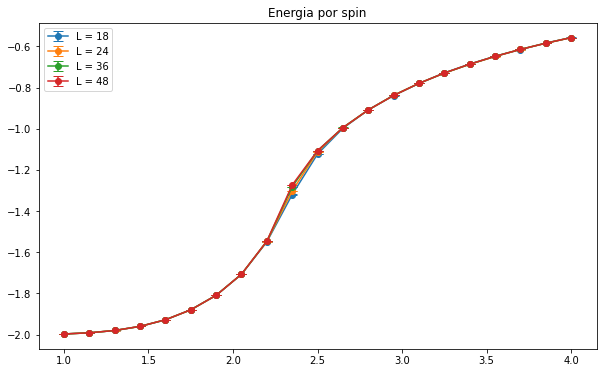

In [154]:
plt.figure(figsize=(10,6))
plt.title("Energia por spin")
plt.errorbar(temps, eners[0], yerr=erros_ener[0], capsize=5, label="L = 18",fmt='-o')
plt.errorbar(temps, eners[1], yerr=erros_ener[1], capsize=5, label="L = 24",fmt='-o')
plt.errorbar(temps, eners[2], yerr=erros_ener[2], capsize=5, label="L = 36",fmt='-o')
plt.errorbar(temps, eners[3], yerr=erros_ener[3], capsize=5, label="L = 48",fmt='-o')
plt.legend()
plt.show()

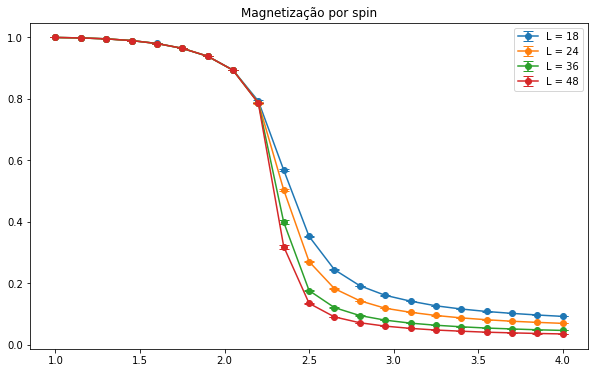

In [155]:
plt.figure(figsize=(10,6))
plt.title("Magnetização por spin")
plt.errorbar(temps, mags[0], yerr=erros_mag[0], capsize=5, label="L = 18",fmt='-o')
plt.errorbar(temps, mags[1], yerr=erros_mag[1], capsize=5, label="L = 24",fmt='-o')
plt.errorbar(temps, mags[2], yerr=erros_mag[2], capsize=5, label="L = 36",fmt='-o')
plt.errorbar(temps, mags[3], yerr=erros_mag[3], capsize=5, label="L = 48",fmt='-o')
plt.legend()
plt.show()

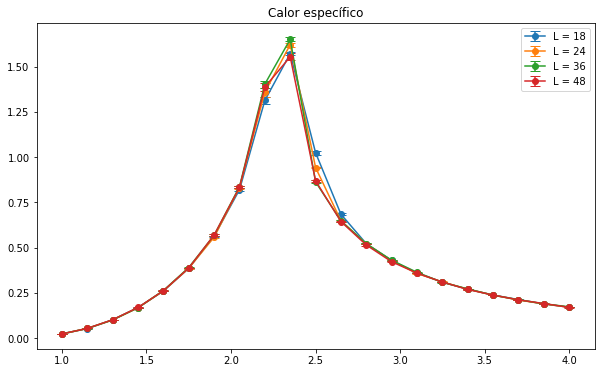

In [156]:
plt.figure(figsize=(10,6))
plt.title("Calor específico")
plt.errorbar(temps, calores[0], yerr=erros_calor[0], capsize=5, label="L = 18", fmt='-o')
plt.errorbar(temps, calores[1], yerr=erros_calor[1], capsize=5, label="L = 24", fmt='-o')
plt.errorbar(temps, calores[2], yerr=erros_calor[2], capsize=5, label="L = 36", fmt='-o')
plt.errorbar(temps, calores[3], yerr=erros_calor[3], capsize=5, label="L = 48", fmt='-o')
plt.legend()
plt.show()

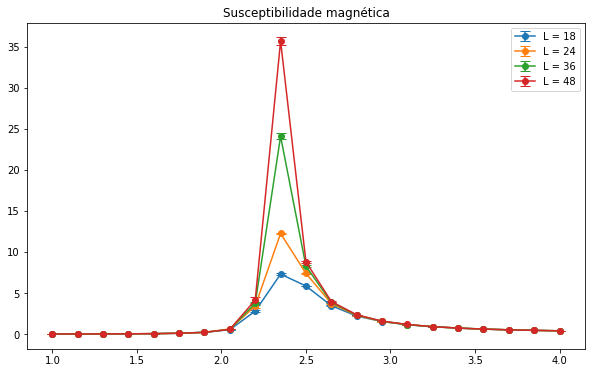

In [157]:
plt.figure(figsize=(10,6))
plt.title("Susceptibilidade magnética")
plt.errorbar(temps, suscepts[0], yerr=erros_suscept[0], capsize=5, label="L = 18", fmt='-o')
plt.errorbar(temps, suscepts[1], yerr=erros_suscept[1], capsize=5, label="L = 24", fmt='-o')
plt.errorbar(temps, suscepts[2], yerr=erros_suscept[2], capsize=5, label="L = 36", fmt='-o')
plt.errorbar(temps, suscepts[3], yerr=erros_suscept[3], capsize=5, label="L = 48", fmt='-o')
plt.legend()
plt.show()

Dos resultados obtidos, pode-se concluir que para L muito grande os resultados não variam muito, com exceção da susceptibilidade magnética que parece tender a altos valores para T ~ 2.3 conforme os valores de L aumentam.

Sobre a possibilidade de uma transição de fase, é possível pensar nessa possibilidade ao visualizar os gráficos na região de T entre 2 e 3. Nessa região os gráficos se comportam de maneira diferente. Para os valores da energia por spin e magnetização por spin, estes possuem maior variação nessa região; para o calor específico e a susceptibilidade magnética vemos gráficos semelhantes àqueles que descrevem fenômenos de ressonância. Esses comportamentos nos gráficos podem demonstrar uma transição de fase.

Os valores de erro, apesar de pequenos, são maiores próximos à região de possível transição de fase, próximo à temperatura T ~ 2.3. Esses maiores valores são justificados pelos gráficos da magnetização em função dos passos de Monte Carlo, que mostram que para valores de T próximos a 2.3, a magnetização varia de forma máxima, isto é pode assumir muitos valores entre a magnetização total possível M e -M. Para outros valores de T, os valores assumidos pela magnetização são menos dispersos. 